In [1]:
import pandas as pd
from get_results import *
import pickle
from datetime import date
import os
cwd = os.getcwd()
import pdb
import numpy as np
import random

### get_results()

In [7]:
import requests
import json
import pickle
import os
import pdb
cwd = os.getcwd()

def process_match(match):
    hometeam = match["homeTeam"]["name"]
    awayteam = match["awayTeam"]["name"]
    homescore = match["score"]["fullTime"]["home"]
    awayscore = match["score"]["fullTime"]["away"]
    group =  match["group"]
    stage = match["stage"]
    score = f"{homescore} - {awayscore}"
    if stage == "GROUP_STAGE":
        letter = group[-1]
        matchid = f"Group {letter} Predictions [{hometeam} - {awayteam}]"
    else:
        matchid = f"{stage} Predictions [{hometeam} - {awayteam}]"
    return matchid,score

def get_results():
    uri = 'https://api.football-data.org/v4/competitions/EC/matches'
    headers = { 'X-Auth-Token': '242e02ff31ea497fbe4b85978fe70b81' }
    
    response = requests.get(uri, headers=headers)
    
    matches  = response.json()["matches"]
    results = []
    for m in matches:
        results.append(process_match(m))
    return results


def save_results(filename,a):
    with open(filename, 'wb') as handle:
        pickle.dump(a, handle)

def load_results(filename):
    with open(filename, 'rb') as handle:
        b = pickle.load(handle)
    return b

# Function that fetches the largest index of downloaded data
def get_highest_result_number():
    n_file = 0
    for i in range(100):
        isf = os.path.isfile(cwd + f"/results/data_{i}.pickle")
        if isf:
            n_file = i
    return n_file

In [134]:
results = get_results()
results

[('Group A Predictions [Germany - Scotland]', 'None - None'),
 ('Group A Predictions [Hungary - Switzerland]', 'None - None'),
 ('Group B Predictions [Spain - Croatia]', 'None - None'),
 ('Group B Predictions [Italy - Albania]', 'None - None'),
 ('Group D Predictions [Poland - Netherlands]', 'None - None'),
 ('Group C Predictions [Slovenia - Denmark]', 'None - None'),
 ('Group C Predictions [Serbia - England]', 'None - None'),
 ('Group E Predictions [Romania - Ukraine]', 'None - None'),
 ('Group E Predictions [Belgium - Slovakia]', 'None - None'),
 ('Group D Predictions [Austria - France]', 'None - None'),
 ('Group F Predictions [Turkey - Georgia]', 'None - None'),
 ('Group F Predictions [Portugal - Czechia]', 'None - None'),
 ('Group B Predictions [Croatia - Albania]', 'None - None'),
 ('Group A Predictions [Germany - Hungary]', 'None - None'),
 ('Group A Predictions [Scotland - Switzerland]', 'None - None'),
 ('Group C Predictions [Slovenia - Serbia]', 'None - None'),
 ('Group C Pred

In [135]:
for day in range(12):
    date = "June "+str(day+1)

    for i in range(3):
        list_var = list( results[day*3:day*3+3][i])
        list_var[1] = str(random.randint(0,4))+" - "+str(random.randint(0,4))
        results[day*3 + i] = tuple(list_var)

In [136]:
results

[('Group A Predictions [Germany - Scotland]', '2 - 2'),
 ('Group A Predictions [Hungary - Switzerland]', '0 - 0'),
 ('Group B Predictions [Spain - Croatia]', '3 - 0'),
 ('Group B Predictions [Italy - Albania]', '2 - 2'),
 ('Group D Predictions [Poland - Netherlands]', '2 - 2'),
 ('Group C Predictions [Slovenia - Denmark]', '3 - 4'),
 ('Group C Predictions [Serbia - England]', '0 - 1'),
 ('Group E Predictions [Romania - Ukraine]', '3 - 3'),
 ('Group E Predictions [Belgium - Slovakia]', '3 - 2'),
 ('Group D Predictions [Austria - France]', '3 - 4'),
 ('Group F Predictions [Turkey - Georgia]', '1 - 3'),
 ('Group F Predictions [Portugal - Czechia]', '4 - 2'),
 ('Group B Predictions [Croatia - Albania]', '4 - 3'),
 ('Group A Predictions [Germany - Hungary]', '2 - 0'),
 ('Group A Predictions [Scotland - Switzerland]', '2 - 2'),
 ('Group C Predictions [Slovenia - Serbia]', '1 - 0'),
 ('Group C Predictions [Denmark - England]', '3 - 1'),
 ('Group B Predictions [Spain - Italy]', '1 - 3'),
 ('Gr

In [17]:
find_group_winners(results)

{'Group A': {'1st': 'Germany', '2nd': 'Scotland'},
 'Group B': {'1st': 'Italy', '2nd': 'Croatia'},
 'Group C': {'1st': 'Slovenia', '2nd': 'Serbia'},
 'Group D': {'1st': 'Austria', '2nd': 'France'},
 'Group E': {'1st': 'Romania', '2nd': 'Slovakia'},
 'Group F': {'1st': 'Turkey', '2nd': 'Czechia'}}

In [32]:
results[36] = ('LAST_16 Predictions [Germany - Croatia]', '2 - 1')
results[37] = ('LAST_16 Predictions [Italy - Scotland]', '2 - 1')
results[38] = ('LAST_16 Predictions [Slovenia - France]', '2 - 1')
results[39] = ('LAST_16 Predictions [Austria - Serbia]', '2 - 1')
results[40] = ('LAST_16 Predictions [Romania - Czechia]', '2 - 1')
results[41] = ('LAST_16 Predictions [Turkey - Slovakia]', '2 - 1')
results[42] = ('LAST_16 Predictions [Denmark - Spain]', '2 - 1')
results[43] = ('LAST_16 Predictions [Ukraine - Poland]', '2 - 1')

results[44] = ('QUARTER_FINALS Predictions [Germany - Italy]', '2 - 1')
results[45] = ('QUARTER_FINALS Predictions [Slovenia - Austria]', '2 - 1')
results[46] = ('QUARTER_FINALS Predictions [Romania - Turkey]', '2 - 1')
results[47] = ('QUARTER_FINALS Predictions [Denmark - Ukraine]', '2 - 1')

results[48] = ('SEMI_FINALS Predictions [Germany - Slovenia]', '2 - 1')
results[49] = ('SEMI_FINALS Predictions [Romania - Denmark]', '2 - 1')

results[50] = ('FINAL Predictions [Germany - Romania]', '4 - 5')

with open('test_results.pkl', 'wb') as f:
    pickle.dump(results, f)

In [30]:
results

[('Group A Predictions [Germany - Scotland]', '4 - 3'),
 ('Group A Predictions [Hungary - Switzerland]', '2 - 1'),
 ('Group B Predictions [Spain - Croatia]', '1 - 4'),
 ('Group B Predictions [Italy - Albania]', '4 - 0'),
 ('Group D Predictions [Poland - Netherlands]', '1 - 4'),
 ('Group C Predictions [Slovenia - Denmark]', '4 - 1'),
 ('Group C Predictions [Serbia - England]', '2 - 2'),
 ('Group E Predictions [Romania - Ukraine]', '4 - 1'),
 ('Group E Predictions [Belgium - Slovakia]', '4 - 4'),
 ('Group D Predictions [Austria - France]', '4 - 4'),
 ('Group F Predictions [Turkey - Georgia]', '0 - 0'),
 ('Group F Predictions [Portugal - Czechia]', '1 - 2'),
 ('Group B Predictions [Croatia - Albania]', '2 - 1'),
 ('Group A Predictions [Germany - Hungary]', '2 - 2'),
 ('Group A Predictions [Scotland - Switzerland]', '4 - 1'),
 ('Group C Predictions [Slovenia - Serbia]', '2 - 2'),
 ('Group C Predictions [Denmark - England]', '0 - 4'),
 ('Group B Predictions [Spain - Italy]', '2 - 3'),
 ('Gr

In [12]:
# Based on results_dict, find group winners
def find_group_winners(results):
    results_dict = {results[x][0]:results[x][1] for x in range(len(results)) if "Group" in results[x][0]}
    all_group_names = np.unique([k[:7] for k,v in results_dict.items()]).tolist()
    all_group_res = {group:{"1st":"","2nd":""} for group in all_group_names}


    for group_name in all_group_names:
        group_results = {k: v for k,v in results_dict.items() if k[:7] == group_name}
        group_home_countries = [k.split("[")[-1].split("]")[0].split("-")[0].strip() for k in list(group_results.keys())]
        group_away_countries = [k.split("[")[-1].split("]")[0].split("-")[1].strip() for k in list(group_results.keys())]
        group_countries = np.unique(group_home_countries + group_away_countries).tolist()
        
        group_eval = {country:{"points":0,"goals_for":0,"goals_against":0}  for country in group_countries}
        
        # Variable to skip calc if None score is present
        skip_group = False
        for k,v in group_results.items():
            home_team = k.split("[")[-1].split("]")[0].split("-")[0].strip()
            away_team = k.split("[")[-1].split("]")[0].split("-")[1].strip()    
            
            home_score = v.split("-")[0].strip()
            away_score = v.split("-")[1].strip()
            
            if home_score == "None" or away_score == "None":
                print("No results for",home_team,"-",away_team)
                skip_group = True
                break
            else:
                group_eval[home_team]["goals_for"] += int(home_score)
                group_eval[home_team]["goals_against"] += int(away_score)
                
                group_eval[away_team]["goals_for"] += int(away_score)
                group_eval[away_team]["goals_against"] += int(home_score)
                
                if int(home_score) > int(away_score):
                    group_eval[home_team]["points"] += 3
                elif int(home_score) < int(away_score):
                    group_eval[away_team]["points"] += 3
                elif int(home_score) == int(away_score):
                    group_eval[away_team]["points"] += 1
                    group_eval[home_team]["points"] += 1
        
        if skip_group:
            # If None value is present in current group we skip current group and go to next group
            print("Skipping",group_name," due to None values")
            
            #if group_name == all_group_names[-1]:
                #return {"Skip":0}
            #else:
            continue                           
        ### Find 1st and 2nd place in group
        
        # Sort group after points
        group_stand = {k:v["points"] for k,v in group_eval.items()}
        group_stand = dict(sorted(group_stand.items(), key=lambda item: item[1], reverse = True))
        
        if sum(np.array(list(group_stand.values())) == max(list(group_stand.values()))) == 1:
            # The scenario where only 1 team has max points
            all_group_res[group_name]["1st"] = list(group_stand.keys())[0]
            # Remove 1st team
            del group_stand[list(group_stand.keys())[0]]
            
            # Find 2nd best team
            if sum(np.array(list(group_stand.values())) == max(list(group_stand.values()))) == 1:
                # The scenario where only 1 team has 2nd most points
                all_group_res[group_name]["2nd"] = list(group_stand.keys())[0]
            elif sum(np.array(list(group_stand.values())) == max(list(group_stand.values()))) == 2:
                # The scenario where 2 teams have 2nd most points - look into match results
                equal_teams = np.array(list(group_stand.keys()))[np.array(list(group_stand.values())) == max(list(group_stand.values()))].tolist()
                equal_teams_match = {k:v for k,v in group_results.items() if equal_teams[0] in k and equal_teams[1] in k}
                
                home_score = int(list(equal_teams_match.values())[0].split("-")[0])
                away_score = int(list(equal_teams_match.values())[0].split("-")[1])
                
                if home_score > away_score:
                    all_group_res[group_name]["2nd"] = list(equal_teams_match.keys())[0].split("[")[-1].split("]")[0].split("-")[0].strip()
                elif home_score < away_score:
                    all_group_res[group_name]["2nd"] = list(equal_teams_match.keys())[0].split("[")[-1].split("]")[0].split("-")[1].strip()
                elif home_score == away_score:
                    # The scenario where the 2 teams drew against each other - Look into goal difference
                    equal_points = {team:group_eval[team]["goals_for"]-group_eval[team]["goals_against"] for team in equal_teams}
                    equal_points = dict(sorted(equal_points.items(), key=lambda item: item[1], reverse = True))
                    
                    if equal_points[equal_teams[0]] > equal_points[equal_teams[1]]:
                        all_group_res[group_name]["2nd"] = equal_teams[0]
                    elif equal_points[equal_teams[0]] < equal_points[equal_teams[1]]:
                        all_group_res[group_name]["2nd"] = equal_teams[1]  
                    elif equal_points[equal_teams[0]] == equal_points[equal_teams[1]]:
                        # The scenario where the 2 teams also have the same goal difference - look into goals scored
                        equal_goals = {team:group_eval[team]["goals_for"] for team in equal_teams}
                        equal_goals = dict(sorted(equal_goals.items(), key=lambda item: item[1], reverse = True))
                        
                        if equal_goals[equal_teams[0]] > equal_goals[equal_teams[1]]:
                            all_group_res[group_name]["2nd"] = equal_teams[0]
                        elif equal_goals[equal_teams[0]] < equal_goals[equal_teams[1]]:
                            all_group_res[group_name]["2nd"] = equal_teams[1]
                        elif equal_goals[equal_teams[0]] == equal_goals[equal_teams[1]]:
                            print("Its a coin toss - manual assign:",equal_teams[0],"-",equal_teams[1]) 
                            all_group_res[group_name]["2nd"] = "---"  
                
            elif sum(np.array(list(group_stand.values())) == max(list(group_stand.values()))) == 3:
                # The scenario where 3 teams have 2nd most points - look into goal difference
                equal_teams = np.array(list(group_stand.keys()))[np.array(list(group_stand.values())) == max(list(group_stand.values()))].tolist()
                equal_points = {team:group_eval[team]["goals_for"]-group_eval[team]["goals_against"] for team in equal_teams}
                equal_points = dict(sorted(equal_points.items(), key=lambda item: item[1], reverse = True))
                
                if sum(np.array(list(equal_points.values())) == max(list(equal_points.values()))) == 1:
                    # The scenario where 1 of 3 teams have the best goal difference
                    all_group_res[group_name]["2nd"] =  list(equal_points.keys())[0]
                elif sum(np.array(list(equal_points.values())) == max(list(equal_points.values()))) == 2:
                    # The scenario where 2 of 3 teams have the best goal difference - look into goals scored
                    equal_teams = np.array(list(equal_points.keys()))[np.array(list(equal_points.values())) == max(list(equal_points.values()))].tolist()
                    equal_goals = {team:group_eval[team]["goals_for"]for team in equal_teams}
                    equal_goals = dict(sorted(equal_goals.items(), key=lambda item: item[1], reverse = True))
                    
                    if equal_goals[equal_teams[0]] > equal_goals[equal_teams[1]]:
                        all_group_res[group_name]["2nd"] = equal_teams[0]
                    elif equal_goals[equal_teams[0]] < equal_goals[equal_teams[1]]:
                        all_group_res[group_name]["2nd"] = equal_teams[1]
                    elif equal_goals[equal_teams[0]] == equal_goals[equal_teams[1]]:
                        print("Its a coin toss - manual assign:",equal_teams[0],"-",equal_teams[1]) 
                        all_group_res[group_name]["2nd"] = "---"
                        
                elif sum(np.array(list(equal_points.values())) == max(list(equal_points.values()))) == 3:
                    # The scenario where all 3 teams have the same goal difference - look into goals scored
                    equal_goals = {team:group_eval[team]["goals_for"] for team in equal_teams}
                    equal_goals = dict(sorted(equal_goals.items(), key=lambda item: item[1], reverse = True))
                    
                    if sum(np.array(list(equal_goals.values())) == max(list(equal_goals.values()))) == 1:
                        all_group_res[group_name]["2nd"] =  list(equal_goals.keys())[0]
                    else:
                        print("Its a coin toss - manual assign:",equal_teams[0],",",equal_teams[1],",",equal_teams[2]) 
                        all_group_res[group_name]["2nd"] = "---"
                    
                    
        elif sum(np.array(list(group_stand.values())) == max(list(group_stand.values()))) == 2:
            # The scenario where 2 teams have max points - look into match results
            equal_teams = np.array(list(group_stand.keys()))[np.array(list(group_stand.values())) == max(list(group_stand.values()))].tolist()
            equal_teams_match = {k:v for k,v in group_results.items() if equal_teams[0] in k and equal_teams[1] in k}
            
            home_score = int(list(equal_teams_match.values())[0].split("-")[0])
            away_score = int(list(equal_teams_match.values())[0].split("-")[1])
            
            if home_score > away_score:
                all_group_res[group_name]["1st"] = list(equal_teams_match.keys())[0].split("[")[-1].split("]")[0].split("-")[0].strip()
                all_group_res[group_name]["2nd"] = list(equal_teams_match.keys())[0].split("[")[-1].split("]")[0].split("-")[1].strip()
            elif home_score < away_score:
                all_group_res[group_name]["1st"] = list(equal_teams_match.keys())[0].split("[")[-1].split("]")[0].split("-")[1].strip()
                all_group_res[group_name]["2nd"] = list(equal_teams_match.keys())[0].split("[")[-1].split("]")[0].split("-")[0].strip()
            elif home_score == away_score:
                # The scenario where the 2 teams drew against each other - Look into goal difference
                equal_points = {team:group_eval[team]["goals_for"]-group_eval[team]["goals_against"] for team in equal_teams}
                equal_points = dict(sorted(equal_points.items(), key=lambda item: item[1], reverse = True))
                
                if equal_points[equal_teams[0]] > equal_points[equal_teams[1]]:
                    all_group_res[group_name]["1st"] = equal_teams[0]
                    all_group_res[group_name]["2nd"] = equal_teams[1]
                elif equal_points[equal_teams[0]] < equal_points[equal_teams[1]]:
                    all_group_res[group_name]["1st"] = equal_teams[1]
                    all_group_res[group_name]["2nd"] = equal_teams[0]  
                elif equal_points[equal_teams[0]] == equal_points[equal_teams[1]]:
                    # The scenario where the 2 teams also have the same goal difference - look into goals scored
                    equal_goals = {team:group_eval[team]["goals_for"] for team in equal_teams}
                    equal_goals = dict(sorted(equal_goals.items(), key=lambda item: item[1], reverse = True))
                    
                    if equal_goals[equal_teams[0]] > equal_goals[equal_teams[1]]:
                        all_group_res[group_name]["1st"] = equal_teams[0]
                        all_group_res[group_name]["2nd"] = equal_teams[1]
                    elif equal_goals[equal_teams[0]] < equal_goals[equal_teams[1]]:
                        all_group_res[group_name]["1st"] = equal_teams[1]
                        all_group_res[group_name]["2nd"] = equal_teams[0]
                    elif equal_goals[equal_teams[0]] == equal_goals[equal_teams[1]]:
                        print("Its a coin toss - manual assign:",equal_teams[0],"-",equal_teams[1]) 
                        all_group_res[group_name]["1st"] = "---"
                        all_group_res[group_name]["2nd"] = "---"
            
        elif sum(np.array(list(group_stand.values())) == max(list(group_stand.values()))) == 3:
            # The scenario where 3 teams have max points - look into goal difference
            equal_teams = np.array(list(group_stand.keys()))[np.array(list(group_stand.values())) == max(list(group_stand.values()))].tolist()
            equal_points = {team:group_eval[team]["goals_for"]-group_eval[team]["goals_against"] for team in equal_teams}
            equal_points = dict(sorted(equal_points.items(), key=lambda item: item[1], reverse = True))
            
            if sum(np.array(list(equal_points.values())) == max(list(equal_points.values()))) == 1:
                # The scenario where 1 team has best goal difference
                all_group_res[group_name]["1st"] = list(equal_points.keys())[0]
                del equal_points[list(equal_points.keys())[0]]
                
                # Find 2nd best goal difference 
                if sum(np.array(list(equal_points.values())) == max(list(equal_points.values()))) == 1:
                    # The scenario where there's 1 team with 2nd best goal difference
                    all_group_res[group_name]["2nd"] = list(equal_points.keys())[0]
                elif sum(np.array(list(equal_points.values())) == max(list(equal_points.values()))) == 2:
                    # The scenario where 2 teams have 2nd best goal difference - look into goals scored
                    equal_teams = [list(equal_points.keys())[0] , list(equal_points.keys())[1] ]
                    equal_goals = {team:group_eval[team]["goals_for"] for team in equal_teams}
                    equal_goals = dict(sorted(equal_goals.items(), key=lambda item: item[1], reverse = True))
                    
                    if equal_goals[equal_teams[0]] > equal_goals[equal_teams[1]]:
                        all_group_res[group_name]["2nd"] = equal_teams[0]
                    elif equal_goals[equal_teams[0]] < equal_goals[equal_teams[1]]:
                        all_group_res[group_name]["2nd"] = equal_teams[1]
                    elif equal_goals[equal_teams[0]] == equal_goals[equal_teams[1]]:
                        print("Its a coin toss - manual assign:",equal_teams[0],"-",equal_teams[1]) 
                        all_group_res[group_name]["2nd"] = "---"
                
            elif sum(np.array(list(equal_points.values())) == max(list(equal_points.values()))) == 2:
                # The scenario where 2 teams have the best goal difference - look into goals scored
                equal_teams = [list(equal_points.keys())[0] , list(equal_points.keys())[1] ]
                
                equal_goals = {team:group_eval[team]["goals_for"] for team in equal_teams}
                equal_goals = dict(sorted(equal_goals.items(), key=lambda item: item[1], reverse = True))
                
                if equal_goals[equal_teams[0]] > equal_goals[equal_teams[1]]:
                    all_group_res[group_name]["1st"] = equal_teams[0]
                    all_group_res[group_name]["2nd"] = equal_teams[1]
                elif equal_goals[equal_teams[0]] < equal_goals[equal_teams[1]]:
                    all_group_res[group_name]["1st"] = equal_teams[1]
                    all_group_res[group_name]["2nd"] = equal_teams[0]
                elif equal_goals[equal_teams[0]] == equal_goals[equal_teams[1]]:
                    print("Its a coin toss - manual assign:",equal_teams[0],"-",equal_teams[1]) 
                    all_group_res[group_name]["1st"] = "---"
                    all_group_res[group_name]["2nd"] = "---"
                
            elif sum(np.array(list(equal_points.values())) == max(list(equal_points.values()))) == 3:
                # The scenario where 3 teams have the best goal difference - look into goals scored
                equal_goals = {team:group_eval[team]["goals_for"] for team in list(equal_points.keys())}
                equal_goals = dict(sorted(equal_goals.items(), key=lambda item: item[1], reverse = True))
                
                if sum(np.array(list(equal_goals.values())) == max(list(equal_goals.values()))) == 1:
                    # The scenario where 1 team has most scored goals
                    all_group_res[group_name]["1st"] = list(equal_goals.keys())[0]
                    del equal_goals[list(equal_goals.keys())[0]]
                    
                    # find 2nd best team
                    if sum(np.array(list(equal_goals.values())) == max(list(equal_goals.values()))) == 1:
                        # The scenario where there's 1 team with 2nd best goal scored
                        all_group_res[group_name]["2nd"] = list(equal_goals.keys())[0]
                    elif sum(np.array(list(equal_goals.values())) == max(list(equal_goals.values()))) == 2:
                        # The scenario where there's 2 teams with 2nd best goals scored - its a coin toss
                        print("Its a coin toss - manual assign:",list(equal_goals.keys())[0],"-",list(equal_goals.keys())[1],"-",list(equal_goals.keys())[2]) 
                        all_group_res[group_name]["1st"] = "---"
                        all_group_res[group_name]["2nd"] = "---"
                                
                elif sum(np.array(list(equal_goals.values())) == max(list(equal_goals.values()))) > 1:
                    # The scenario where 2 or more teams have same points, goal difference and goals scored - coin toss
                    print("Its a coin toss - manual assign:",list(equal_goals.keys())[0],"-",list(equal_goals.keys())[1],"-",list(equal_goals.keys())[2]) 
                    all_group_res[group_name]["1st"] = "---"
                    all_group_res[group_name]["2nd"] = "---"
    return all_group_res

### main

In [3]:
results = get_results()
date = date.today()
datafile = [results,date]
n_file = get_highest_result_number()

prev_results = load_results(cwd + f"/results/data_{n_file}.pickle")
if prev_results[0] != results:
    print("New results saved")
    save_results(cwd + f"/results/data_{n_file+1}.pickle",datafile)


predictions = pd.read_csv("EM spillet 2024.csv")

In [3]:

predictions = pd.read_csv("EM spillet 2024.csv")

In [4]:
predictions

,Timestamp,Your Name,Which team(s) do you belong to?,Group A Predictions [Germany - Scotland],Group A Predictions [Hungary - Switzerland],Group A Predictions [Germany - Hungary],Group A Predictions [Scotland - Switzerland],Group A Predictions [Switzerland - Germany],Group A Predictions [Scotland - Hungary],Group B Predictions [Spain - Croatia],...,Group E 1st place,Group E 2nd place,Group F 1st place,Group F 2nd place,UEFA EURO 2024 final winner,UEFA EURO 2024 final loser,\nWho is going to be the topscore throughout the UEFA EURO 2024? (20 points),How many goals does the topscorer score? (10 points),Which round does Denmark reach? (15 points),How many goals does Denmark score in total? (20 points)
0,2024/05/13 10:50:07 PM GMT+3,Test,Friends and Family,0-0,0-2,2-0,1-0,0-0,1-0,1-2,...,Slovakia,Romania,Türkey,Portugal,Denmark,Czech Republic,Kylian Mbappe,8,Group play,8
1,2024/05/22 8:32:44 PM GMT+3,Sarah Mobil test,Frederikborg Gymnasium,3-1,2-2,2-1,3-0,2-1,0-2,0-0,...,Belgium,Romania,the Czech Republic,Portugal,Denmark,Albania,Erling Haaland,11,Final,10
2,2024/05/22 8:38:07 PM GMT+3,Sarah omputer,Frederikborg Gymnasium;Sædbanken,1-0,0-1,1-0,0-1,1-0,0-1,2-0,...,Slovakia,Belgium,Portugal,Turkey,Denmark,Germany,Kylian Mbappe,12,Final,21
3,2024/05/29 2:35:39 PM GMT+3,TESTER-SHH,European Sperm Bank,0-1,0-1,1-0,1-0,0-1,0-1,1-0,...,Belgium,Romania,Turkey,Portugal,Scotland,Slovakia,Kylian Mbappe,7,Round of 16,6


In [5]:
predictions.loc[len(predictions), predictions.columns] = [0]*len(predictions.columns)

In [6]:
predictions

,Timestamp,Your Name,Which team(s) do you belong to?,Group A Predictions [Germany - Scotland],Group A Predictions [Hungary - Switzerland],Group A Predictions [Germany - Hungary],Group A Predictions [Scotland - Switzerland],Group A Predictions [Switzerland - Germany],Group A Predictions [Scotland - Hungary],Group B Predictions [Spain - Croatia],...,Group E 1st place,Group E 2nd place,Group F 1st place,Group F 2nd place,UEFA EURO 2024 final winner,UEFA EURO 2024 final loser,\nWho is going to be the topscore throughout the UEFA EURO 2024? (20 points),How many goals does the topscorer score? (10 points),Which round does Denmark reach? (15 points),How many goals does Denmark score in total? (20 points)
0,2024/05/13 10:50:07 PM GMT+3,Test,Friends and Family,0-0,0-2,2-0,1-0,0-0,1-0,1-2,...,Slovakia,Romania,Türkey,Portugal,Denmark,Czech Republic,Kylian Mbappe,8.0,Group play,8.0
1,2024/05/22 8:32:44 PM GMT+3,Sarah Mobil test,Frederikborg Gymnasium,3-1,2-2,2-1,3-0,2-1,0-2,0-0,...,Belgium,Romania,the Czech Republic,Portugal,Denmark,Albania,Erling Haaland,11.0,Final,10.0
2,2024/05/22 8:38:07 PM GMT+3,Sarah omputer,Frederikborg Gymnasium;Sædbanken,1-0,0-1,1-0,0-1,1-0,0-1,2-0,...,Slovakia,Belgium,Portugal,Turkey,Denmark,Germany,Kylian Mbappe,12.0,Final,21.0
3,2024/05/29 2:35:39 PM GMT+3,TESTER-SHH,European Sperm Bank,0-1,0-1,1-0,1-0,0-1,0-1,1-0,...,Belgium,Romania,Turkey,Portugal,Scotland,Slovakia,Kylian Mbappe,7.0,Round of 16,6.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0,0.0


In [4]:
# Eval predictions against results - DONE

def eval_match_predictions(predictions_df , results):
    # Convert results to a dict (and select only group stage matches)
    results_dict = {results[x][0]:results[x][1] for x in range(len(results)) if "Group" in results[x][0]}
    # Select the group stage matches in predictions
    predictions = predictions_df.iloc[:,3:39]
    
    # Initialize empty points var
    points = 0
    for i in range(len(predictions)):
        pred = predictions.iloc[0,i]
        res = results_dict[predictions.columns[i]]
        
        # Check for nan (to be able to do temporary standings)
        if res != res or pred != pred:
            continue
        else:
            ### 15 points, correct score for both teams
            if pred == res:
                points += 15
        
            ### 10 points, correct outcome and score for one team
            # Home team wins and correct score of home team    
            elif res[0]>res[2] and pred[0]>pred[2] and res[0] == pred[0]:
                points += 10
            # Home team wins and correct score of away team  
            elif res[0]>res[2] and pred[0]>pred[2] and res[2] == pred[2]:
                points += 10
            # Away team wins and correct score of home team  
            elif res[0]<res[2] and pred[0]<pred[2] and res[0] == pred[0]:
                points += 10
            # Away team wins and correct score of away team  
            elif res[0]<res[2] and pred[0]<pred[2] and res[2] == pred[2]:
                points += 10
            
            ### 5 points, correct outcome (winner or tie)
            # Home team wins
            elif res[0]>res[2] and pred[0]>pred[2]:
                points += 5
            # Away team wins
            elif res[0]<res[2] and pred[0]<pred[2]:
                points += 5
            # Tie
            elif res[0]==res[2] and pred[0]==pred[2]:
                points += 5   
                
            ### 2 points, correct score for one team
            # Home team correct score
            elif res[0]==pred[0]:
                points += 2
            # Away team correct score
            elif res[2]==pred[2]:
                points += 2
                
    return points

In [5]:
results_dict = {results[x][0]:results[x][1] for x in range(len(results)) if "Group" in results[x][0]}
results_dict

{'Group A Predictions [Germany - Scotland]': 'None - None',
 'Group A Predictions [Hungary - Switzerland]': 'None - None',
 'Group B Predictions [Spain - Croatia]': 'None - None',
 'Group B Predictions [Italy - Albania]': 'None - None',
 'Group D Predictions [Poland - Netherlands]': 'None - None',
 'Group C Predictions [Slovenia - Denmark]': 'None - None',
 'Group C Predictions [Serbia - England]': 'None - None',
 'Group E Predictions [Romania - Ukraine]': 'None - None',
 'Group E Predictions [Belgium - Slovakia]': 'None - None',
 'Group D Predictions [Austria - France]': 'None - None',
 'Group F Predictions [Turkey - Georgia]': 'None - None',
 'Group F Predictions [Portugal - Czechia]': 'None - None',
 'Group B Predictions [Croatia - Albania]': 'None - None',
 'Group A Predictions [Germany - Hungary]': 'None - None',
 'Group A Predictions [Scotland - Switzerland]': 'None - None',
 'Group C Predictions [Slovenia - Serbia]': 'None - None',
 'Group C Predictions [Denmark - England]': 'No

In [6]:
results_dict2 = results_dict.copy()
results_dict3 = {k:str(random.randint(0,4))+"-"+str(random.randint(0,4)) for k,v in results_dict2.items()}

In [7]:
all_group_names = np.unique([k[:7] for k,v in results_dict3.items()]).tolist()
all_group_res = {group:{"1st":"","2nd":""} for group in all_group_names}


for group_name in all_group_names:
    group_results = {k: v for k,v in results_dict3.items() if k[:7] == group_name}
    group_home_countries = [k.split("[")[-1].split("]")[0].split("-")[0].strip() for k in list(group_results.keys())]
    group_away_countries = [k.split("[")[-1].split("]")[0].split("-")[1].strip() for k in list(group_results.keys())]
    group_countries = np.unique(group_home_countries + group_away_countries).tolist()
    
    group_eval = {country:{"points":0,"goals_for":0,"goals_against":0}  for country in group_countries}
    
    for k,v in group_results.items():
        home_team = k.split("[")[-1].split("]")[0].split("-")[0].strip()
        away_team = k.split("[")[-1].split("]")[0].split("-")[1].strip()    
        
        home_score = v.split("-")[0].strip()
        away_score = v.split("-")[1].strip()
        
        if home_score == "None" or away_score == "None":
            print("No results for",home_team,"-",away_team)
            # Continue to next group!!!!!
        else:
            group_eval[home_team]["goals_for"] += int(home_score)
            group_eval[home_team]["goals_against"] += int(away_score)
            
            group_eval[away_team]["goals_for"] += int(away_score)
            group_eval[away_team]["goals_against"] += int(home_score)
            
            if int(home_score) > int(away_score):
                group_eval[home_team]["points"] += 3
            elif int(home_score) < int(away_score):
                group_eval[away_team]["points"] += 3
            elif int(home_score) == int(away_score):
                group_eval[away_team]["points"] += 1
                group_eval[home_team]["points"] += 1
                                
    ### Find 1st and 2nd place in group
    
    # Sort group after points
    group_stand = {k:v["points"] for k,v in group_eval.items()}
    group_stand = dict(sorted(group_stand.items(), key=lambda item: item[1], reverse = True))
     
    if sum(np.array(list(group_stand.values())) == max(list(group_stand.values()))) == 1:
        # The scenario where only 1 team has max points
        all_group_res[group_name]["1st"] = list(group_stand.keys())[0]
        # Remove 1st team
        del group_stand[list(group_stand.keys())[0]]
        
        # Find 2nd best team
        if sum(np.array(list(group_stand.values())) == max(list(group_stand.values()))) == 1:
            # The scenario where only 1 team has 2nd most points
            all_group_res[group_name]["2nd"] = list(group_stand.keys())[0]
        elif sum(np.array(list(group_stand.values())) == max(list(group_stand.values()))) == 2:
            # The scenario where 2 teams have 2nd most points - look into match results
            equal_teams = np.array(list(group_stand.keys()))[np.array(list(group_stand.values())) == max(list(group_stand.values()))].tolist()
            equal_teams_match = {k:v for k,v in group_results.items() if equal_teams[0] in k and equal_teams[1] in k}
            
            home_score = int(list(equal_teams_match.values())[0].split("-")[0])
            away_score = int(list(equal_teams_match.values())[0].split("-")[1])
            
            if home_score > away_score:
                all_group_res[group_name]["2nd"] = list(equal_teams_match.keys())[0].split("[")[-1].split("]")[0].split("-")[0].strip()
            elif home_score < away_score:
                all_group_res[group_name]["2nd"] = list(equal_teams_match.keys())[0].split("[")[-1].split("]")[0].split("-")[1].strip()
            elif home_score == away_score:
                # The scenario where the 2 teams drew against each other - Look into goal difference
                equal_points = {team:group_eval[team]["goals_for"]-group_eval[team]["goals_against"] for team in equal_teams}
                equal_points = dict(sorted(equal_points.items(), key=lambda item: item[1], reverse = True))
                
                if equal_points[equal_teams[0]] > equal_points[equal_teams[1]]:
                    all_group_res[group_name]["2nd"] = equal_teams[0]
                elif equal_points[equal_teams[0]] < equal_points[equal_teams[1]]:
                    all_group_res[group_name]["2nd"] = equal_teams[1]  
                elif equal_points[equal_teams[0]] == equal_points[equal_teams[1]]:
                    # The scenario where the 2 teams also have the same goal difference - look into goals scored
                    equal_goals = {team:group_eval[team]["goals_for"] for team in equal_teams}
                    equal_goals = dict(sorted(equal_goals.items(), key=lambda item: item[1], reverse = True))
                    
                    if equal_goals[equal_teams[0]] > equal_goals[equal_teams[1]]:
                        all_group_res[group_name]["2nd"] = equal_teams[0]
                    elif equal_goals[equal_teams[0]] < equal_goals[equal_teams[1]]:
                        all_group_res[group_name]["2nd"] = equal_teams[1]
                    elif equal_goals[equal_teams[0]] == equal_goals[equal_teams[1]]:
                        print("Its a coin toss - manual assign:",equal_teams[0],"-",equal_teams[1]) 
                        all_group_res[group_name]["2nd"] = "---"  
            
        elif sum(np.array(list(group_stand.values())) == max(list(group_stand.values()))) == 3:
            # The scenario where 3 teams have 2nd most points - look into goal difference
            equal_teams = np.array(list(group_stand.keys()))[np.array(list(group_stand.values())) == max(list(group_stand.values()))].tolist()
            equal_points = {team:group_eval[team]["goals_for"]-group_eval[team]["goals_against"] for team in equal_teams}
            equal_points = dict(sorted(equal_points.items(), key=lambda item: item[1], reverse = True))
            
            if sum(np.array(list(equal_points.values())) == max(list(equal_points.values()))) == 1:
                # The scenario where 1 of 3 teams have the best goal difference
                all_group_res[group_name]["2nd"] =  list(equal_points.keys())[0]
            elif sum(np.array(list(equal_points.values())) == max(list(equal_points.values()))) == 2:
                # The scenario where 2 of 3 teams have the best goal difference - look into goals scored
                equal_teams = np.array(list(equal_points.keys()))[np.array(list(equal_points.values())) == max(list(equal_points.values()))].tolist()
                equal_goals = {team:group_eval[team]["goals_for"]for team in equal_teams}
                equal_goals = dict(sorted(equal_goals.items(), key=lambda item: item[1], reverse = True))
                
                if equal_goals[equal_teams[0]] > equal_goals[equal_teams[1]]:
                    all_group_res[group_name]["2nd"] = equal_teams[0]
                elif equal_goals[equal_teams[0]] < equal_goals[equal_teams[1]]:
                    all_group_res[group_name]["2nd"] = equal_teams[1]
                elif equal_goals[equal_teams[0]] == equal_goals[equal_teams[1]]:
                    print("Its a coin toss - manual assign:",equal_teams[0],"-",equal_teams[1]) 
                    all_group_res[group_name]["2nd"] = "---"
                    
            elif sum(np.array(list(equal_points.values())) == max(list(equal_points.values()))) == 3:
                # The scenario where all 3 teams have the same goal difference - look into goals scored
                equal_goals = {team:group_eval[team]["goals_for"] for team in equal_teams}
                equal_goals = dict(sorted(equal_goals.items(), key=lambda item: item[1], reverse = True))
                
                if sum(np.array(list(equal_goals.values())) == max(list(equal_goals.values()))) == 1:
                    all_group_res[group_name]["2nd"] =  list(equal_goals.keys())[0]
                else:
                    print("Its a coin toss - manual assign:",equal_teams[0],",",equal_teams[1],",",equal_teams[2]) 
                    all_group_res[group_name]["2nd"] = "---"
                
                
    elif sum(np.array(list(group_stand.values())) == max(list(group_stand.values()))) == 2:
        # The scenario where 2 teams have max points - look into match results
        equal_teams = np.array(list(group_stand.keys()))[np.array(list(group_stand.values())) == max(list(group_stand.values()))].tolist()
        equal_teams_match = {k:v for k,v in group_results.items() if equal_teams[0] in k and equal_teams[1] in k}
        
        home_score = int(list(equal_teams_match.values())[0].split("-")[0])
        away_score = int(list(equal_teams_match.values())[0].split("-")[1])
        
        if home_score > away_score:
            all_group_res[group_name]["1st"] = list(equal_teams_match.keys())[0].split("[")[-1].split("]")[0].split("-")[0].strip()
            all_group_res[group_name]["2nd"] = list(equal_teams_match.keys())[0].split("[")[-1].split("]")[0].split("-")[1].strip()
        elif home_score < away_score:
            all_group_res[group_name]["1st"] = list(equal_teams_match.keys())[0].split("[")[-1].split("]")[0].split("-")[1].strip()
            all_group_res[group_name]["2nd"] = list(equal_teams_match.keys())[0].split("[")[-1].split("]")[0].split("-")[0].strip()
        elif home_score == away_score:
            # The scenario where the 2 teams drew against each other - Look into goal difference
            equal_points = {team:group_eval[team]["goals_for"]-group_eval[team]["goals_against"] for team in equal_teams}
            equal_points = dict(sorted(equal_points.items(), key=lambda item: item[1], reverse = True))
            
            if equal_points[equal_teams[0]] > equal_points[equal_teams[1]]:
                all_group_res[group_name]["1st"] = equal_teams[0]
                all_group_res[group_name]["2nd"] = equal_teams[1]
            elif equal_points[equal_teams[0]] < equal_points[equal_teams[1]]:
                all_group_res[group_name]["1st"] = equal_teams[1]
                all_group_res[group_name]["2nd"] = equal_teams[0]  
            elif equal_points[equal_teams[0]] == equal_points[equal_teams[1]]:
                # The scenario where the 2 teams also have the same goal difference - look into goals scored
                equal_goals = {team:group_eval[team]["goals_for"] for team in equal_teams}
                equal_goals = dict(sorted(equal_goals.items(), key=lambda item: item[1], reverse = True))
                
                if equal_goals[equal_teams[0]] > equal_goals[equal_teams[1]]:
                    all_group_res[group_name]["1st"] = equal_teams[0]
                    all_group_res[group_name]["2nd"] = equal_teams[1]
                elif equal_goals[equal_teams[0]] < equal_goals[equal_teams[1]]:
                    all_group_res[group_name]["1st"] = equal_teams[1]
                    all_group_res[group_name]["2nd"] = equal_teams[0]
                elif equal_goals[equal_teams[0]] == equal_goals[equal_teams[1]]:
                    print("Its a coin toss - manual assign:",equal_teams[0],"-",equal_teams[1]) 
                    all_group_res[group_name]["1st"] = "---"
                    all_group_res[group_name]["2nd"] = "---"
        
    elif sum(np.array(list(group_stand.values())) == max(list(group_stand.values()))) == 3:
        # The scenario where 3 teams have max points - look into goal difference
        equal_teams = np.array(list(group_stand.keys()))[np.array(list(group_stand.values())) == max(list(group_stand.values()))].tolist()
        equal_points = {team:group_eval[team]["goals_for"]-group_eval[team]["goals_against"] for team in equal_teams}
        equal_points = dict(sorted(equal_points.items(), key=lambda item: item[1], reverse = True))
        
        if sum(np.array(list(equal_points.values())) == max(list(equal_points.values()))) == 1:
            # The scenario where 1 team has best goal difference
            all_group_res[group_name]["1st"] = list(equal_points.keys())[0]
            del equal_points[list(equal_points.keys())[0]]
            
            # Find 2nd best goal difference 
            if sum(np.array(list(equal_points.values())) == max(list(equal_points.values()))) == 1:
                # The scenario where there's 1 team with 2nd best goal difference
                all_group_res[group_name]["2nd"] = list(equal_points.keys())[0]
            elif sum(np.array(list(equal_points.values())) == max(list(equal_points.values()))) == 2:
                # The scenario where 2 teams have 2nd best goal difference - look into goals scored
                equal_teams = [list(equal_points.keys())[0] , list(equal_points.keys())[1] ]
                equal_goals = {team:group_eval[team]["goals_for"] for team in equal_teams}
                equal_goals = dict(sorted(equal_goals.items(), key=lambda item: item[1], reverse = True))
                
                if equal_goals[equal_teams[0]] > equal_goals[equal_teams[1]]:
                    all_group_res[group_name]["2nd"] = equal_teams[0]
                elif equal_goals[equal_teams[0]] < equal_goals[equal_teams[1]]:
                    all_group_res[group_name]["2nd"] = equal_teams[1]
                elif equal_goals[equal_teams[0]] == equal_goals[equal_teams[1]]:
                    print("Its a coin toss - manual assign:",equal_teams[0],"-",equal_teams[1]) 
                    all_group_res[group_name]["2nd"] = "---"
            
        elif sum(np.array(list(equal_points.values())) == max(list(equal_points.values()))) == 2:
            # The scenario where 2 teams have the best goal difference - look into goals scored
            equal_teams = [list(equal_points.keys())[0] , list(equal_points.keys())[1] ]
            
            equal_goals = {team:group_eval[team]["goals_for"] for team in equal_teams}
            equal_goals = dict(sorted(equal_goals.items(), key=lambda item: item[1], reverse = True))
            
            if equal_goals[equal_teams[0]] > equal_goals[equal_teams[1]]:
                all_group_res[group_name]["1st"] = equal_teams[0]
                all_group_res[group_name]["2nd"] = equal_teams[1]
            elif equal_goals[equal_teams[0]] < equal_goals[equal_teams[1]]:
                all_group_res[group_name]["1st"] = equal_teams[1]
                all_group_res[group_name]["2nd"] = equal_teams[0]
            elif equal_goals[equal_teams[0]] == equal_goals[equal_teams[1]]:
                print("Its a coin toss - manual assign:",equal_teams[0],"-",equal_teams[1]) 
                all_group_res[group_name]["1st"] = "---"
                all_group_res[group_name]["2nd"] = "---"
            
        elif sum(np.array(list(equal_points.values())) == max(list(equal_points.values()))) == 3:
            # The scenario where 3 teams have the best goal difference - look into goals scored
            equal_goals = {team:group_eval[team]["goals_for"] for team in list(equal_points.keys())}
            equal_goals = dict(sorted(equal_goals.items(), key=lambda item: item[1], reverse = True))
            
            if sum(np.array(list(equal_goals.values())) == max(list(equal_goals.values()))) == 1:
                # The scenario where 1 team has most scored goals
                all_group_res[group_name]["1st"] = list(equal_goals.keys())[0]
                del equal_goals[list(equal_goals.keys())[0]]
                
                # find 2nd best team
                if sum(np.array(list(equal_goals.values())) == max(list(equal_goals.values()))) == 1:
                    # The scenario where there's 1 team with 2nd best goal scored
                    all_group_res[group_name]["2nd"] = list(equal_goals.keys())[0]
                elif sum(np.array(list(equal_goals.values())) == max(list(equal_goals.values()))) == 2:
                    # The scenario where there's 2 teams with 2nd best goals scored - its a coin toss
                    print("Its a coin toss - manual assign:",list(equal_goals.keys())[0],"-",list(equal_goals.keys())[1],"-",list(equal_goals.keys())[2]) 
                    all_group_res[group_name]["1st"] = "---"
                    all_group_res[group_name]["2nd"] = "---"
                            
            elif sum(np.array(list(equal_goals.values())) == max(list(equal_goals.values()))) > 1:
                # The scenario where 2 or more teams have same points, goal difference and goals scored - coin toss
                print("Its a coin toss - manual assign:",list(equal_goals.keys())[0],"-",list(equal_goals.keys())[1],"-",list(equal_goals.keys())[2]) 
                all_group_res[group_name]["1st"] = "---"
                all_group_res[group_name]["2nd"] = "---"
    print(group_results)
    print("")
    print(group_eval)
    print("-------------")    
    

{'Group A Predictions [Germany - Scotland]': '2-2', 'Group A Predictions [Hungary - Switzerland]': '3-0', 'Group A Predictions [Germany - Hungary]': '1-4', 'Group A Predictions [Scotland - Switzerland]': '2-1', 'Group A Predictions [Scotland - Hungary]': '1-1', 'Group A Predictions [Switzerland - Germany]': '2-1'}

{'Germany': {'points': 1, 'goals_for': 4, 'goals_against': 8}, 'Hungary': {'points': 7, 'goals_for': 8, 'goals_against': 2}, 'Scotland': {'points': 5, 'goals_for': 5, 'goals_against': 4}, 'Switzerland': {'points': 3, 'goals_for': 3, 'goals_against': 6}}
-------------
{'Group B Predictions [Spain - Croatia]': '2-0', 'Group B Predictions [Italy - Albania]': '4-2', 'Group B Predictions [Croatia - Albania]': '3-0', 'Group B Predictions [Spain - Italy]': '1-0', 'Group B Predictions [Albania - Spain]': '0-3', 'Group B Predictions [Croatia - Italy]': '2-0'}

{'Albania': {'points': 0, 'goals_for': 2, 'goals_against': 10}, 'Croatia': {'points': 6, 'goals_for': 5, 'goals_against': 2},

In [8]:
all_group_res

{'Group A': {'1st': 'Hungary', '2nd': 'Scotland'},
 'Group B': {'1st': 'Spain', '2nd': 'Croatia'},
 'Group C': {'1st': 'Slovenia', '2nd': 'England'},
 'Group D': {'1st': 'Austria', '2nd': 'France'},
 'Group E': {'1st': 'Ukraine', '2nd': 'Belgium'},
 'Group F': {'1st': 'Georgia', '2nd': 'Turkey'}}

In [9]:
# Based on results, find group winners
def find_group_winners(results_dict):
    all_group_names = np.unique([k[:7] for k,v in results_dict.items()]).tolist()
    all_group_res = {group:{"1st":"","2nd":""} for group in all_group_names}


    for group_name in all_group_names:
        group_results = {k: v for k,v in results_dict.items() if k[:7] == group_name}
        group_home_countries = [k.split("[")[-1].split("]")[0].split("-")[0].strip() for k in list(group_results.keys())]
        group_away_countries = [k.split("[")[-1].split("]")[0].split("-")[1].strip() for k in list(group_results.keys())]
        group_countries = np.unique(group_home_countries + group_away_countries).tolist()
        
        group_eval = {country:{"points":0,"goals_for":0,"goals_against":0}  for country in group_countries}
        
        # Variable to skip calc if None score is present
        skip_group = False
        for k,v in group_results.items():
            home_team = k.split("[")[-1].split("]")[0].split("-")[0].strip()
            away_team = k.split("[")[-1].split("]")[0].split("-")[1].strip()    
            
            home_score = v.split("-")[0].strip()
            away_score = v.split("-")[1].strip()
            
            if home_score == "None" or away_score == "None":
                print("No results for",home_team,"-",away_team)
                skip_group = True
                break
            else:
                group_eval[home_team]["goals_for"] += int(home_score)
                group_eval[home_team]["goals_against"] += int(away_score)
                
                group_eval[away_team]["goals_for"] += int(away_score)
                group_eval[away_team]["goals_against"] += int(home_score)
                
                if int(home_score) > int(away_score):
                    group_eval[home_team]["points"] += 3
                elif int(home_score) < int(away_score):
                    group_eval[away_team]["points"] += 3
                elif int(home_score) == int(away_score):
                    group_eval[away_team]["points"] += 1
                    group_eval[home_team]["points"] += 1
        
        if skip_group:
            # If None value is present in current group we skip current group and go to next group
            print("Skipping",group_name," due to None values")
            
            if group_name == all_group_names[-1]:
                return {"Skip":0}
            else:
                continue                            
        ### Find 1st and 2nd place in group
        
        # Sort group after points
        group_stand = {k:v["points"] for k,v in group_eval.items()}
        group_stand = dict(sorted(group_stand.items(), key=lambda item: item[1], reverse = True))
        
        if sum(np.array(list(group_stand.values())) == max(list(group_stand.values()))) == 1:
            # The scenario where only 1 team has max points
            all_group_res[group_name]["1st"] = list(group_stand.keys())[0]
            # Remove 1st team
            del group_stand[list(group_stand.keys())[0]]
            
            # Find 2nd best team
            if sum(np.array(list(group_stand.values())) == max(list(group_stand.values()))) == 1:
                # The scenario where only 1 team has 2nd most points
                all_group_res[group_name]["2nd"] = list(group_stand.keys())[0]
            elif sum(np.array(list(group_stand.values())) == max(list(group_stand.values()))) == 2:
                # The scenario where 2 teams have 2nd most points - look into match results
                equal_teams = np.array(list(group_stand.keys()))[np.array(list(group_stand.values())) == max(list(group_stand.values()))].tolist()
                equal_teams_match = {k:v for k,v in group_results.items() if equal_teams[0] in k and equal_teams[1] in k}
                
                home_score = int(list(equal_teams_match.values())[0].split("-")[0])
                away_score = int(list(equal_teams_match.values())[0].split("-")[1])
                
                if home_score > away_score:
                    all_group_res[group_name]["2nd"] = list(equal_teams_match.keys())[0].split("[")[-1].split("]")[0].split("-")[0].strip()
                elif home_score < away_score:
                    all_group_res[group_name]["2nd"] = list(equal_teams_match.keys())[0].split("[")[-1].split("]")[0].split("-")[1].strip()
                elif home_score == away_score:
                    # The scenario where the 2 teams drew against each other - Look into goal difference
                    equal_points = {team:group_eval[team]["goals_for"]-group_eval[team]["goals_against"] for team in equal_teams}
                    equal_points = dict(sorted(equal_points.items(), key=lambda item: item[1], reverse = True))
                    
                    if equal_points[equal_teams[0]] > equal_points[equal_teams[1]]:
                        all_group_res[group_name]["2nd"] = equal_teams[0]
                    elif equal_points[equal_teams[0]] < equal_points[equal_teams[1]]:
                        all_group_res[group_name]["2nd"] = equal_teams[1]  
                    elif equal_points[equal_teams[0]] == equal_points[equal_teams[1]]:
                        # The scenario where the 2 teams also have the same goal difference - look into goals scored
                        equal_goals = {team:group_eval[team]["goals_for"] for team in equal_teams}
                        equal_goals = dict(sorted(equal_goals.items(), key=lambda item: item[1], reverse = True))
                        
                        if equal_goals[equal_teams[0]] > equal_goals[equal_teams[1]]:
                            all_group_res[group_name]["2nd"] = equal_teams[0]
                        elif equal_goals[equal_teams[0]] < equal_goals[equal_teams[1]]:
                            all_group_res[group_name]["2nd"] = equal_teams[1]
                        elif equal_goals[equal_teams[0]] == equal_goals[equal_teams[1]]:
                            print("Its a coin toss - manual assign:",equal_teams[0],"-",equal_teams[1]) 
                            all_group_res[group_name]["2nd"] = "---"  
                
            elif sum(np.array(list(group_stand.values())) == max(list(group_stand.values()))) == 3:
                # The scenario where 3 teams have 2nd most points - look into goal difference
                equal_teams = np.array(list(group_stand.keys()))[np.array(list(group_stand.values())) == max(list(group_stand.values()))].tolist()
                equal_points = {team:group_eval[team]["goals_for"]-group_eval[team]["goals_against"] for team in equal_teams}
                equal_points = dict(sorted(equal_points.items(), key=lambda item: item[1], reverse = True))
                
                if sum(np.array(list(equal_points.values())) == max(list(equal_points.values()))) == 1:
                    # The scenario where 1 of 3 teams have the best goal difference
                    all_group_res[group_name]["2nd"] =  list(equal_points.keys())[0]
                elif sum(np.array(list(equal_points.values())) == max(list(equal_points.values()))) == 2:
                    # The scenario where 2 of 3 teams have the best goal difference - look into goals scored
                    equal_teams = np.array(list(equal_points.keys()))[np.array(list(equal_points.values())) == max(list(equal_points.values()))].tolist()
                    equal_goals = {team:group_eval[team]["goals_for"]for team in equal_teams}
                    equal_goals = dict(sorted(equal_goals.items(), key=lambda item: item[1], reverse = True))
                    
                    if equal_goals[equal_teams[0]] > equal_goals[equal_teams[1]]:
                        all_group_res[group_name]["2nd"] = equal_teams[0]
                    elif equal_goals[equal_teams[0]] < equal_goals[equal_teams[1]]:
                        all_group_res[group_name]["2nd"] = equal_teams[1]
                    elif equal_goals[equal_teams[0]] == equal_goals[equal_teams[1]]:
                        print("Its a coin toss - manual assign:",equal_teams[0],"-",equal_teams[1]) 
                        all_group_res[group_name]["2nd"] = "---"
                        
                elif sum(np.array(list(equal_points.values())) == max(list(equal_points.values()))) == 3:
                    # The scenario where all 3 teams have the same goal difference - look into goals scored
                    equal_goals = {team:group_eval[team]["goals_for"] for team in equal_teams}
                    equal_goals = dict(sorted(equal_goals.items(), key=lambda item: item[1], reverse = True))
                    
                    if sum(np.array(list(equal_goals.values())) == max(list(equal_goals.values()))) == 1:
                        all_group_res[group_name]["2nd"] =  list(equal_goals.keys())[0]
                    else:
                        print("Its a coin toss - manual assign:",equal_teams[0],",",equal_teams[1],",",equal_teams[2]) 
                        all_group_res[group_name]["2nd"] = "---"
                    
                    
        elif sum(np.array(list(group_stand.values())) == max(list(group_stand.values()))) == 2:
            # The scenario where 2 teams have max points - look into match results
            equal_teams = np.array(list(group_stand.keys()))[np.array(list(group_stand.values())) == max(list(group_stand.values()))].tolist()
            equal_teams_match = {k:v for k,v in group_results.items() if equal_teams[0] in k and equal_teams[1] in k}
            
            home_score = int(list(equal_teams_match.values())[0].split("-")[0])
            away_score = int(list(equal_teams_match.values())[0].split("-")[1])
            
            if home_score > away_score:
                all_group_res[group_name]["1st"] = list(equal_teams_match.keys())[0].split("[")[-1].split("]")[0].split("-")[0].strip()
                all_group_res[group_name]["2nd"] = list(equal_teams_match.keys())[0].split("[")[-1].split("]")[0].split("-")[1].strip()
            elif home_score < away_score:
                all_group_res[group_name]["1st"] = list(equal_teams_match.keys())[0].split("[")[-1].split("]")[0].split("-")[1].strip()
                all_group_res[group_name]["2nd"] = list(equal_teams_match.keys())[0].split("[")[-1].split("]")[0].split("-")[0].strip()
            elif home_score == away_score:
                # The scenario where the 2 teams drew against each other - Look into goal difference
                equal_points = {team:group_eval[team]["goals_for"]-group_eval[team]["goals_against"] for team in equal_teams}
                equal_points = dict(sorted(equal_points.items(), key=lambda item: item[1], reverse = True))
                
                if equal_points[equal_teams[0]] > equal_points[equal_teams[1]]:
                    all_group_res[group_name]["1st"] = equal_teams[0]
                    all_group_res[group_name]["2nd"] = equal_teams[1]
                elif equal_points[equal_teams[0]] < equal_points[equal_teams[1]]:
                    all_group_res[group_name]["1st"] = equal_teams[1]
                    all_group_res[group_name]["2nd"] = equal_teams[0]  
                elif equal_points[equal_teams[0]] == equal_points[equal_teams[1]]:
                    # The scenario where the 2 teams also have the same goal difference - look into goals scored
                    equal_goals = {team:group_eval[team]["goals_for"] for team in equal_teams}
                    equal_goals = dict(sorted(equal_goals.items(), key=lambda item: item[1], reverse = True))
                    
                    if equal_goals[equal_teams[0]] > equal_goals[equal_teams[1]]:
                        all_group_res[group_name]["1st"] = equal_teams[0]
                        all_group_res[group_name]["2nd"] = equal_teams[1]
                    elif equal_goals[equal_teams[0]] < equal_goals[equal_teams[1]]:
                        all_group_res[group_name]["1st"] = equal_teams[1]
                        all_group_res[group_name]["2nd"] = equal_teams[0]
                    elif equal_goals[equal_teams[0]] == equal_goals[equal_teams[1]]:
                        print("Its a coin toss - manual assign:",equal_teams[0],"-",equal_teams[1]) 
                        all_group_res[group_name]["1st"] = "---"
                        all_group_res[group_name]["2nd"] = "---"
            
        elif sum(np.array(list(group_stand.values())) == max(list(group_stand.values()))) == 3:
            # The scenario where 3 teams have max points - look into goal difference
            equal_teams = np.array(list(group_stand.keys()))[np.array(list(group_stand.values())) == max(list(group_stand.values()))].tolist()
            equal_points = {team:group_eval[team]["goals_for"]-group_eval[team]["goals_against"] for team in equal_teams}
            equal_points = dict(sorted(equal_points.items(), key=lambda item: item[1], reverse = True))
            
            if sum(np.array(list(equal_points.values())) == max(list(equal_points.values()))) == 1:
                # The scenario where 1 team has best goal difference
                all_group_res[group_name]["1st"] = list(equal_points.keys())[0]
                del equal_points[list(equal_points.keys())[0]]
                
                # Find 2nd best goal difference 
                if sum(np.array(list(equal_points.values())) == max(list(equal_points.values()))) == 1:
                    # The scenario where there's 1 team with 2nd best goal difference
                    all_group_res[group_name]["2nd"] = list(equal_points.keys())[0]
                elif sum(np.array(list(equal_points.values())) == max(list(equal_points.values()))) == 2:
                    # The scenario where 2 teams have 2nd best goal difference - look into goals scored
                    equal_teams = [list(equal_points.keys())[0] , list(equal_points.keys())[1] ]
                    equal_goals = {team:group_eval[team]["goals_for"] for team in equal_teams}
                    equal_goals = dict(sorted(equal_goals.items(), key=lambda item: item[1], reverse = True))
                    
                    if equal_goals[equal_teams[0]] > equal_goals[equal_teams[1]]:
                        all_group_res[group_name]["2nd"] = equal_teams[0]
                    elif equal_goals[equal_teams[0]] < equal_goals[equal_teams[1]]:
                        all_group_res[group_name]["2nd"] = equal_teams[1]
                    elif equal_goals[equal_teams[0]] == equal_goals[equal_teams[1]]:
                        print("Its a coin toss - manual assign:",equal_teams[0],"-",equal_teams[1]) 
                        all_group_res[group_name]["2nd"] = "---"
                
            elif sum(np.array(list(equal_points.values())) == max(list(equal_points.values()))) == 2:
                # The scenario where 2 teams have the best goal difference - look into goals scored
                equal_teams = [list(equal_points.keys())[0] , list(equal_points.keys())[1] ]
                
                equal_goals = {team:group_eval[team]["goals_for"] for team in equal_teams}
                equal_goals = dict(sorted(equal_goals.items(), key=lambda item: item[1], reverse = True))
                
                if equal_goals[equal_teams[0]] > equal_goals[equal_teams[1]]:
                    all_group_res[group_name]["1st"] = equal_teams[0]
                    all_group_res[group_name]["2nd"] = equal_teams[1]
                elif equal_goals[equal_teams[0]] < equal_goals[equal_teams[1]]:
                    all_group_res[group_name]["1st"] = equal_teams[1]
                    all_group_res[group_name]["2nd"] = equal_teams[0]
                elif equal_goals[equal_teams[0]] == equal_goals[equal_teams[1]]:
                    print("Its a coin toss - manual assign:",equal_teams[0],"-",equal_teams[1]) 
                    all_group_res[group_name]["1st"] = "---"
                    all_group_res[group_name]["2nd"] = "---"
                
            elif sum(np.array(list(equal_points.values())) == max(list(equal_points.values()))) == 3:
                # The scenario where 3 teams have the best goal difference - look into goals scored
                equal_goals = {team:group_eval[team]["goals_for"] for team in list(equal_points.keys())}
                equal_goals = dict(sorted(equal_goals.items(), key=lambda item: item[1], reverse = True))
                
                if sum(np.array(list(equal_goals.values())) == max(list(equal_goals.values()))) == 1:
                    # The scenario where 1 team has most scored goals
                    all_group_res[group_name]["1st"] = list(equal_goals.keys())[0]
                    del equal_goals[list(equal_goals.keys())[0]]
                    
                    # find 2nd best team
                    if sum(np.array(list(equal_goals.values())) == max(list(equal_goals.values()))) == 1:
                        # The scenario where there's 1 team with 2nd best goal scored
                        all_group_res[group_name]["2nd"] = list(equal_goals.keys())[0]
                    elif sum(np.array(list(equal_goals.values())) == max(list(equal_goals.values()))) == 2:
                        # The scenario where there's 2 teams with 2nd best goals scored - its a coin toss
                        print("Its a coin toss - manual assign:",list(equal_goals.keys())[0],"-",list(equal_goals.keys())[1],"-",list(equal_goals.keys())[2]) 
                        all_group_res[group_name]["1st"] = "---"
                        all_group_res[group_name]["2nd"] = "---"
                                
                elif sum(np.array(list(equal_goals.values())) == max(list(equal_goals.values()))) > 1:
                    # The scenario where 2 or more teams have same points, goal difference and goals scored - coin toss
                    print("Its a coin toss - manual assign:",list(equal_goals.keys())[0],"-",list(equal_goals.keys())[1],"-",list(equal_goals.keys())[2]) 
                    all_group_res[group_name]["1st"] = "---"
                    all_group_res[group_name]["2nd"] = "---"
                    
    return all_group_res
    


In [10]:
# Eval group winners

# Select the group winners in predictions
predictions_df = pd.read_csv("EM spillet 2024.csv")
predictions = predictions_df.iloc[:,39:51]
# Compute group stage winners based on results
all_group_res = find_group_winners(results_dict)
# Give points
points = 0
for i in range(6):
    pred1st = predictions.iloc[0,0 + i*2]
    pred2nd = predictions.iloc[0,1 + i*2]
    
    res1st = all_group_res[list(all_group_res.keys())[i]]["1st"]
    res2nd = all_group_res[list(all_group_res.keys())[i]]["2nd"]
    
    if res1st == pred1st and res2nd == pred2nd:
        print(pred1st, pred2nd)
        points += 15
    elif res1st == pred2nd and res2nd == pred1st:
        print(pred1st, pred2nd)
        points += 10
    elif res1st == pred1st or res2nd == pred2nd:
        print(pred1st, pred2nd)
        points += 5
        
points

No results for Germany - Scotland
Skipping Group A  due to None values
No results for Spain - Croatia
Skipping Group B  due to None values
No results for Slovenia - Denmark
Skipping Group C  due to None values
No results for Poland - Netherlands
Skipping Group D  due to None values
No results for Romania - Ukraine
Skipping Group E  due to None values
No results for Turkey - Georgia
Skipping Group F  due to None values


TypeError: 'int' object is not subscriptable

In [12]:
def dk_finish(results, predictions_df):
    # Eval DK finish
    dk_finish = ""
    df_finish_pred = predictions_df.iloc[0,55] 
    points = 0
    results_dict = {results[x][0]:results[x][1] for x in range(len(results)) if "Group" not in results[x][0]}

    last16teams = [k for k,v in results_dict.keys() if "LAST_16" in k]
    quarterteams = [k for k,v in results_dict.keys() if "QUARTER_FINALS" in k]
    semiteams = [k for k,v in results_dict.keys() if "SEMI_FINALS" in k]
    finalteams = [k for k,v in results_dict.keys() if "FINAL" in k]

    if "Denmark" not in last16teams:
        dk_finish = "Group play"
    elif "Denmark" not in quarterteams:
        dk_finish = "Round of 16"
    elif "Denmark" not in semiteams:
        dk_finish = "Quarter final"
    elif "Denmark" not in finalteams:
        dk_finish = "Semi final"
    elif "Denmark" in finalteams:
        dk_finish = "Final"
    else:
        print("HELP, could not find which stage DK finished in")
    
    if len(dk_finish) > 0:
        if df_finish == dk_finish_pred:
            points += 15
            
    return points
    

In [33]:
def dk_goals_scored(results,predictions_df):
    # Find DK goals
    points = 0
    results_dict = {results[x][0]:results[x][1] for x in range(len(results))}
    dk_matches = {k:v for k,v in results_dict.items() if "Denmark" in k}
    dk_goals = 0
    for k,v in dk_matches.items():
        if "Denmark" in k.split("-")[0]:
            dk_goals += int(v.split("-")[0])
        elif "Denmark" in k.split("-")[1]:
            dk_goals += int(v.split("-")[1])
            
    if predictions_df.iloc[:,-1] == dk_goals:
        points = 20

    return points

### Testing

In [3]:
from get_results import *
from eval_funcs import *
from plot_funcs import *
topscorer = ""
topscorer_goals = ""
finale_loser = ""
finale_winner = ""

results = get_results()
predictions_df = pd.read_csv("EM spillet 2024.csv")
    
# Simulate days are going by and results are coming in

for day in range(12):
    date = "June "+str(day+1)
    
    for i in range(3):
        list_var = list( results[day*3:day*3+3][i])
        list_var[1] = str(random.randint(0,4))+" - "+str(random.randint(0,4))
        results[day*3 + i] = tuple(list_var)
    
    for user in predictions_df["Your Name"]:
        user_df = predictions_df[predictions_df["Your Name"] == user]
        
        print(user)
                
        # Calc totalt score as of today 
        points = 0
        points += eval_match_predictions(user_df , results)
        points += eval_groups(user_df , results)
    
        # Add also DK knock out stage 
        #points += dk_finish(results, user_df)
        
        # Add DK goals
        #points += dk_goals_scored(results, user_df)
        
        # Add Top scorer
        if topscorer == user_df.iloc[0,53]:
            points += 20
        
        # Add Topscorer goals
        if topscorer_goals == user_df.iloc[0,54]:
            points += 10
        
        # Add finale winner team
        if finale_winner == predictions_df[predictions_df["Your Name"] == "Test"].iloc[0,51]:
            points += 25
        
        # Add finale loser team
        if finale_loser == predictions_df[predictions_df["Your Name"] == "Test"].iloc[0,52]:
            points += 15

        # Load data frame containing group results
        for group in user_df.iloc[0,2].split(";"):
            if group not in os.listdir("data"):
                # Create an empty df
                df_results = pd.DataFrame()
            else:
                df_results = pd.read_pickle("data/"+group) 
            
            # Upload dataframe with new results
            df_results.loc[date,user] = points
            df_results.to_pickle("data/"+group)

Test
Group A Predictions [Germany - Scotland]
pred: 0-0
res: 3 - 4
No results for Germany - Hungary
Skipping Group A  due to None values
No results for Italy - Albania
Skipping Group B  due to None values
No results for Slovenia - Denmark
Skipping Group C  due to None values
No results for Poland - Netherlands
Skipping Group D  due to None values
No results for Romania - Ukraine
Skipping Group E  due to None values
No results for Turkey - Georgia
Skipping Group F  due to None values
No groups are finished, we skip eval_groups()
Sarah Mobil test
Group A Predictions [Germany - Scotland]
pred: 3-1
res: 3 - 4
points: 10
No results for Germany - Hungary
Skipping Group A  due to None values
No results for Italy - Albania
Skipping Group B  due to None values
No results for Slovenia - Denmark
Skipping Group C  due to None values
No results for Poland - Netherlands
Skipping Group D  due to None values
No results for Romania - Ukraine
Skipping Group E  due to None values
No results for Turkey - 

In [4]:
df_results

,Sarah omputer
June 1,5.0
June 2,5.0
June 3,5.0
June 4,5.0
June 5,5.0
June 6,5.0
June 7,5.0
June 8,5.0
June 9,5.0
June 10,5.0


In [27]:
user_df

,Tidsstempel,Your Name,Which team(s) do you belong to?,Group A Predictions [Germany - Scotland],Group A Predictions [Hungary - Switzerland],Group A Predictions [Germany - Hungary],Group A Predictions [Scotland - Switzerland],Group A Predictions [Switzerland - Germany],Group A Predictions [Scotland - Hungary],Group B Predictions [Spain - Croatia],...,Pulje E 1st,Pulje E 2nd,Pulje F 1st,Pulje F 2nd,EM final winner,EM final loser,\r\nWho is going to be the topscore throughout the World Cup? (20 points),How many goals does the topscorer score? (10 points),Which round does Denmark reach? (15 points),How many goals does Denmark score in total? (20points)
2,2024/05/22 8:38:07 PM EEST,Sarah omputer,Frederikborg Gymnasium;Sædbanken,1-0,0-1,1-0,0-1,1-0,0-1,2-0,...,Slovakia,Belgium,Portugal,Turkey,Denmark,Germany,Kylian Mbappe,12,Final,21


In [5]:
results

[('Group A Predictions [Germany - Scotland]', '3 - 1'),
 ('Group A Predictions [Hungary - Switzerland]', '3 - 0'),
 ('Group B Predictions [Spain - Croatia]', '2 - 3'),
 ('Group B Predictions [Italy - Albania]', '4 - 1'),
 ('Group D Predictions [Poland - Netherlands]', '2 - 1'),
 ('Group C Predictions [Slovenia - Denmark]', '1 - 1'),
 ('Group C Predictions [Serbia - England]', '2 - 2'),
 ('Group E Predictions [Romania - Ukraine]', '1 - 4'),
 ('Group E Predictions [Belgium - Slovakia]', '4 - 4'),
 ('Group D Predictions [Austria - France]', '1 - 1'),
 ('Group F Predictions [Turkey - Georgia]', '4 - 3'),
 ('Group F Predictions [Portugal - Czechia]', '0 - 4'),
 ('Group B Predictions [Croatia - Albania]', '2 - 0'),
 ('Group A Predictions [Germany - Hungary]', '4 - 2'),
 ('Group A Predictions [Scotland - Switzerland]', '0 - 2'),
 ('Group C Predictions [Slovenia - Serbia]', '0 - 1'),
 ('Group C Predictions [Denmark - England]', '1 - 4'),
 ('Group B Predictions [Spain - Italy]', '0 - 2'),
 ('Gr

## Plot user

In [11]:
with open('test_results.pkl', 'rb') as f:
    test_results = pickle.load(f)
test_results

[('Group A Predictions [Germany - Scotland]', '4 - 3'),
 ('Group A Predictions [Hungary - Switzerland]', '2 - 1'),
 ('Group B Predictions [Spain - Croatia]', '1 - 4'),
 ('Group B Predictions [Italy - Albania]', '4 - 0'),
 ('Group D Predictions [Poland - Netherlands]', '1 - 4'),
 ('Group C Predictions [Slovenia - Denmark]', '4 - 1'),
 ('Group C Predictions [Serbia - England]', '2 - 2'),
 ('Group E Predictions [Romania - Ukraine]', '4 - 1'),
 ('Group E Predictions [Belgium - Slovakia]', '4 - 4'),
 ('Group D Predictions [Austria - France]', '4 - 4'),
 ('Group F Predictions [Turkey - Georgia]', '0 - 0'),
 ('Group F Predictions [Portugal - Czechia]', '1 - 2'),
 ('Group B Predictions [Croatia - Albania]', '2 - 1'),
 ('Group A Predictions [Germany - Hungary]', '2 - 2'),
 ('Group A Predictions [Scotland - Switzerland]', '4 - 1'),
 ('Group C Predictions [Slovenia - Serbia]', '2 - 2'),
 ('Group C Predictions [Denmark - England]', '0 - 4'),
 ('Group B Predictions [Spain - Italy]', '2 - 3'),
 ('Gr

In [138]:
df_results.columns

Index(['Timestamp', 'Your Name', 'Which team(s) do you belong to?',
       'Group A Predictions [Germany - Scotland]',
       'Group A Predictions [Hungary - Switzerland]',
       'Group A Predictions [Germany - Hungary]',
       'Group A Predictions [Scotland - Switzerland]',
       'Group A Predictions [Switzerland - Germany]',
       'Group A Predictions [Scotland - Hungary]',
       'Group B Predictions [Spain - Croatia]',
       'Group B Predictions [Italy - Albania]',
       'Group B Predictions [Croatia - Albania]',
       'Group B Predictions [Spain - Italy]',
       'Group B Predictions [Albania - Spain]',
       'Group B Predictions [Croatia - Italy]',
       'Group C Predictions [Slovenia - Denmark]',
       'Group C Predictions [Serbia - England]',
       'Group C Predictions [Slovenia - Serbia]',
       'Group C Predictions [Denmark - England]',
       'Group C Predictions [England - Slovenia]',
       'Group C Predictions [Denmark - Serbia]',
       'Group D Predictions [

In [137]:
df_results = pd.read_pickle("data/user_dfs/Test")
trans_df = df_results.iloc[:,3:].T
trans_df.columns = ["Predictions", "Results","Points"]
trans_df = trans_df.reset_index()
trans_df

,index,Predictions,Results,Points
0,Group A Predictions [Germany - Scotland],0-0,4-3,0
1,Group A Predictions [Hungary - Switzerland],0-2,2-1,0
2,Group A Predictions [Germany - Hungary],2-0,2-2,2
3,Group A Predictions [Scotland - Switzerland],1-0,4-1,5
4,Group A Predictions [Switzerland - Germany],0-0,1-3,0
5,Group A Predictions [Scotland - Hungary],1-0,2-1,5
6,Group B Predictions [Spain - Croatia],1-2,1-4,10
7,Group B Predictions [Italy - Albania],2-1,4-0,5
8,Group B Predictions [Croatia - Albania],3-0,2-1,5
9,Group B Predictions [Spain - Italy],5-1,2-3,0


) missing from current font.mp\ipykernel_36744\602085331.py:24: UserWarning: Glyph 13 (
  plt.savefig("tester_set.svg",bbox_inches='tight', pad_inches=0)
) missing from current font.ckages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


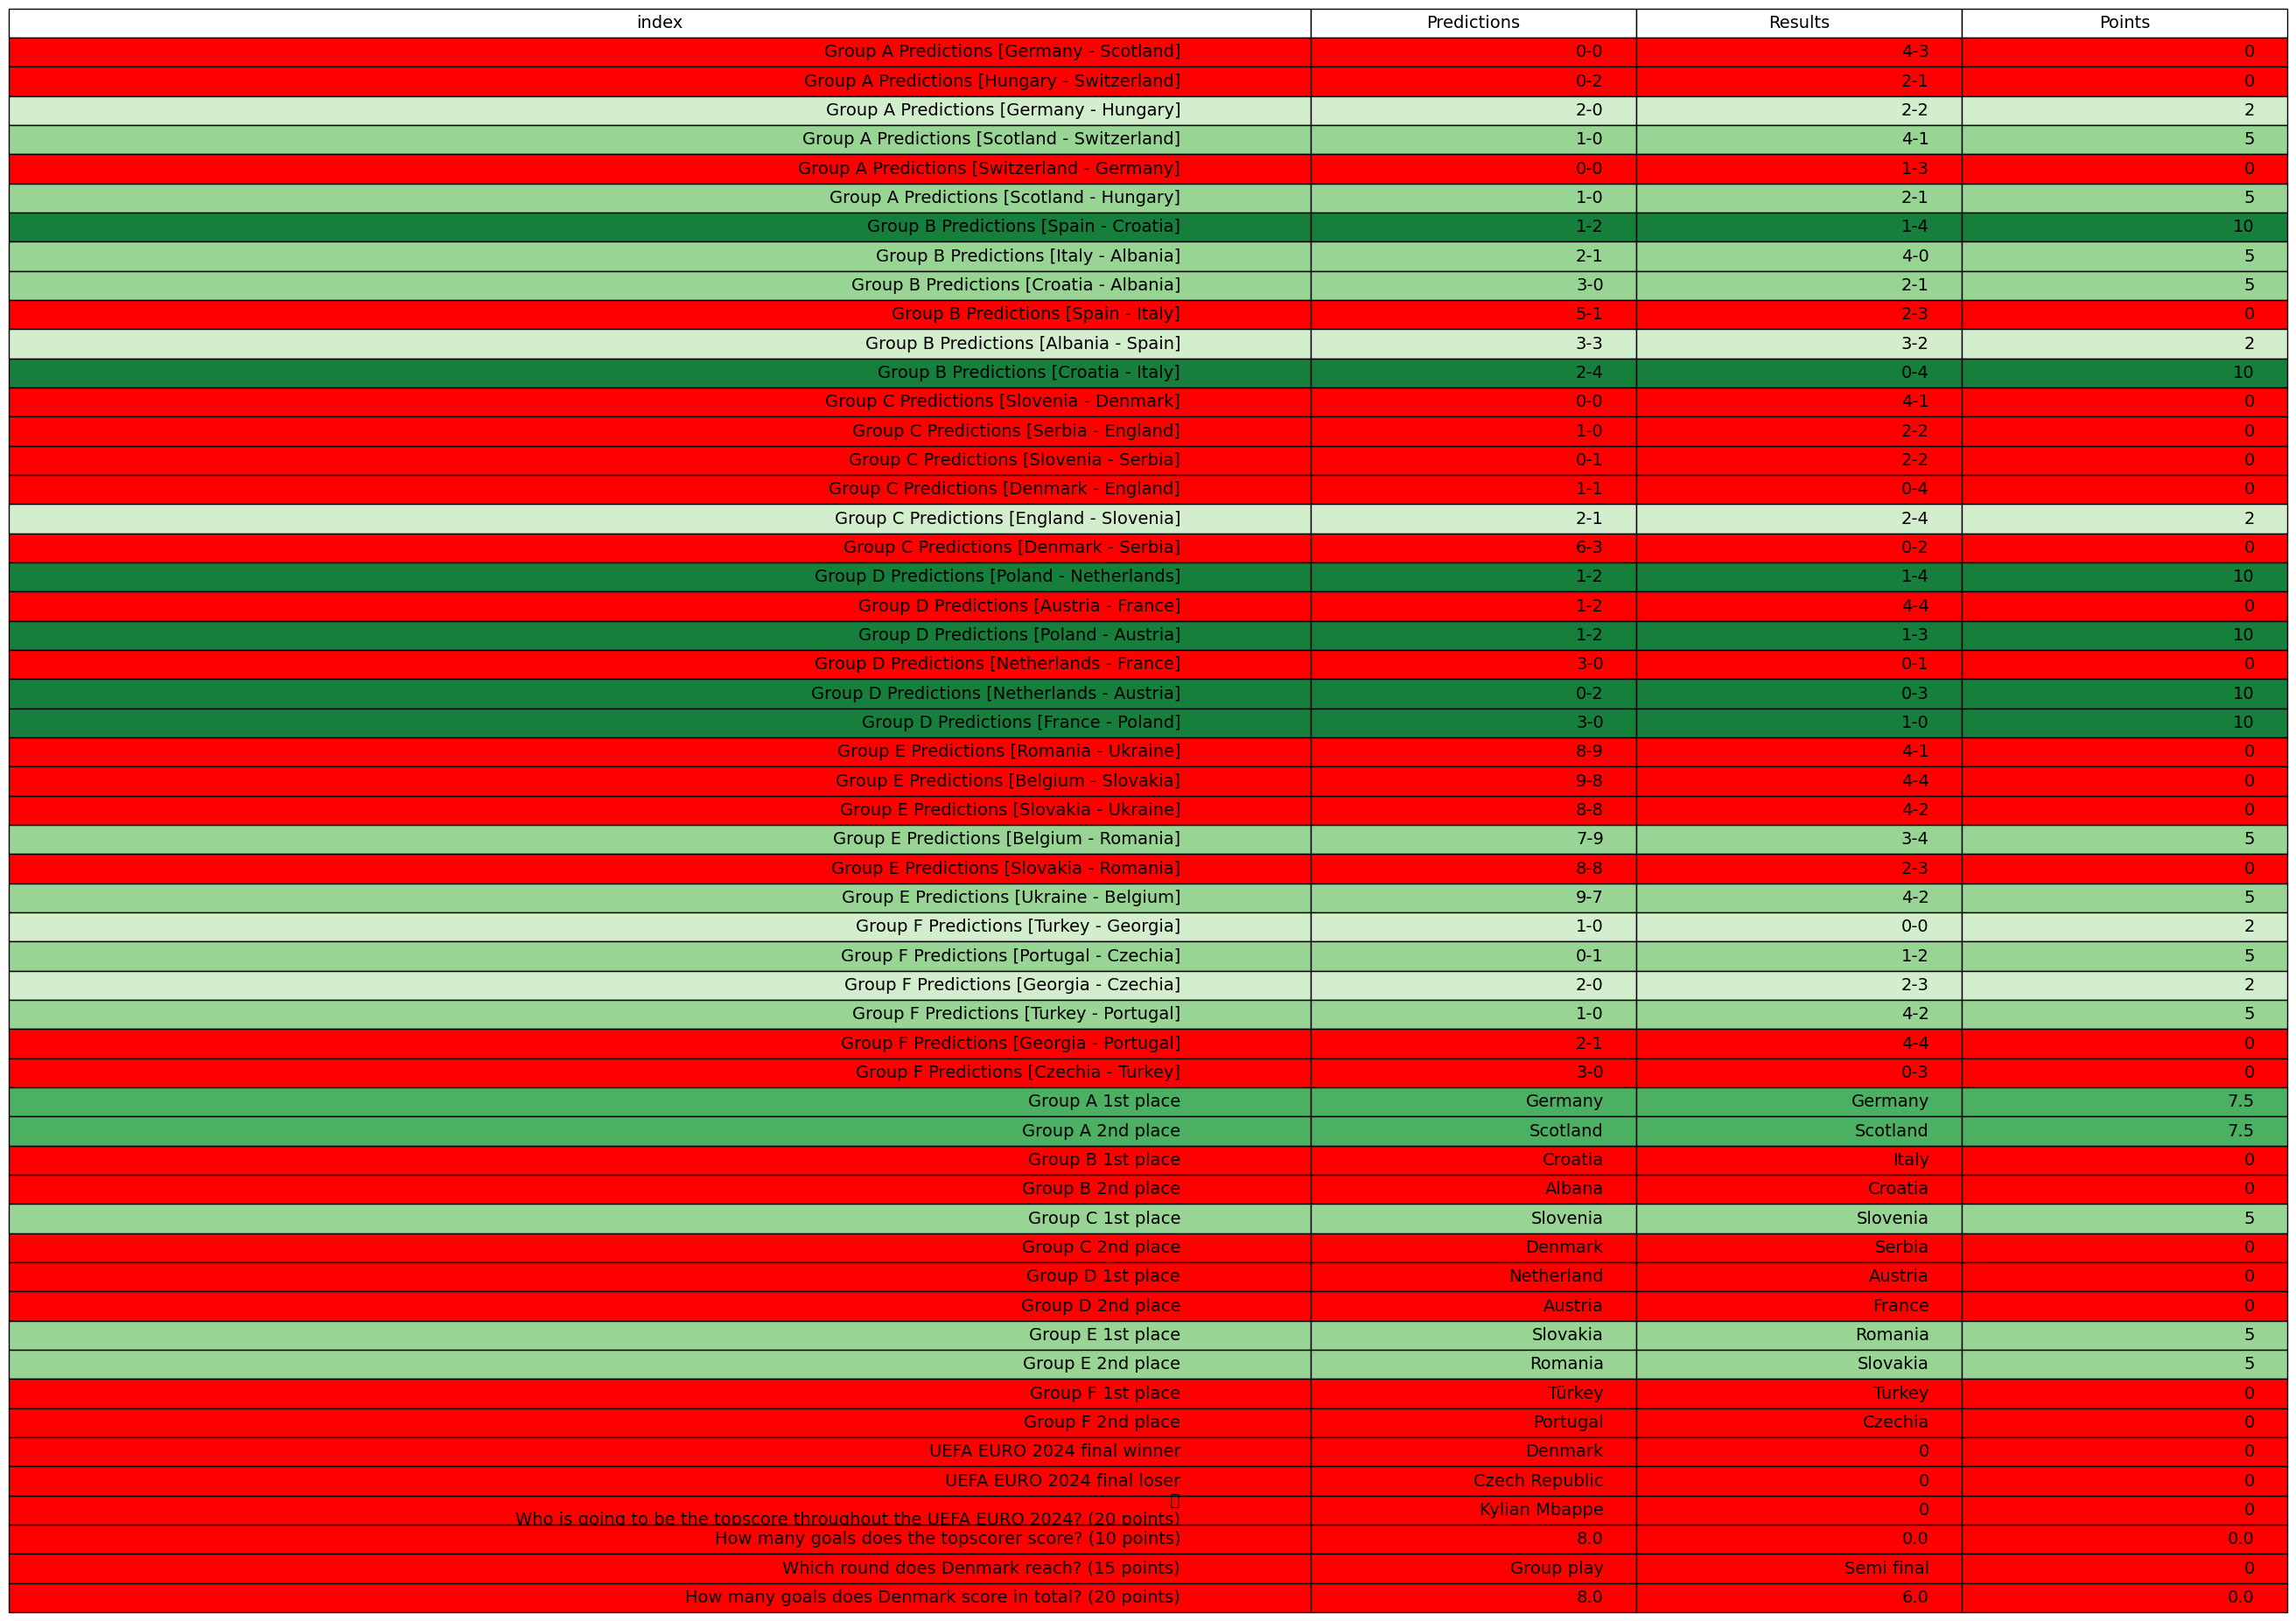

In [133]:
import matplotlib.pyplot as plt

colors = []
for _, row in trans_df.iterrows():
    colors_in_column = [mpl.colormaps["autumn"](0)]*4
    if row["Points"] == 2:
        colors_in_column = [mpl.colormaps["Greens"](0.2)]*4
    elif row["Points"] == 5:
        colors_in_column = [mpl.colormaps["Greens"](0.4)]*4
    if row["Points"] == 7.5:
        colors_in_column = [mpl.colormaps["Greens"](0.6)]*4
    elif row["Points"] == 10:
        colors_in_column = [mpl.colormaps["Greens"](0.8)]*4
    elif row["Points"] == 15:
        colors_in_column = [mpl.colormaps["Greens"](0.99)]*4
    colors.append(colors_in_column)

fig, ax = plt.subplots(figsize=(16,8))
ax.axis('off')
the_table = ax.table(cellText = trans_df.values,colWidths=[0.6,0.15,0.15,0.15] ,colLabels = trans_df.columns, loc='center', cellColours=colors)
the_table.auto_set_font_size(False)
the_table.set_fontsize(14)
the_table.scale(2, 2)
plt.savefig("tester_set.svg",bbox_inches='tight', pad_inches=0)